<a href="https://colab.research.google.com/github/dannyledao/Predicting-Hotel-Cancellations/blob/master/Hotel_Booking_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

#Import dataset
from google.colab import files
uploaded_ = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


## **Predicting hotel cancellations based on reservation details**

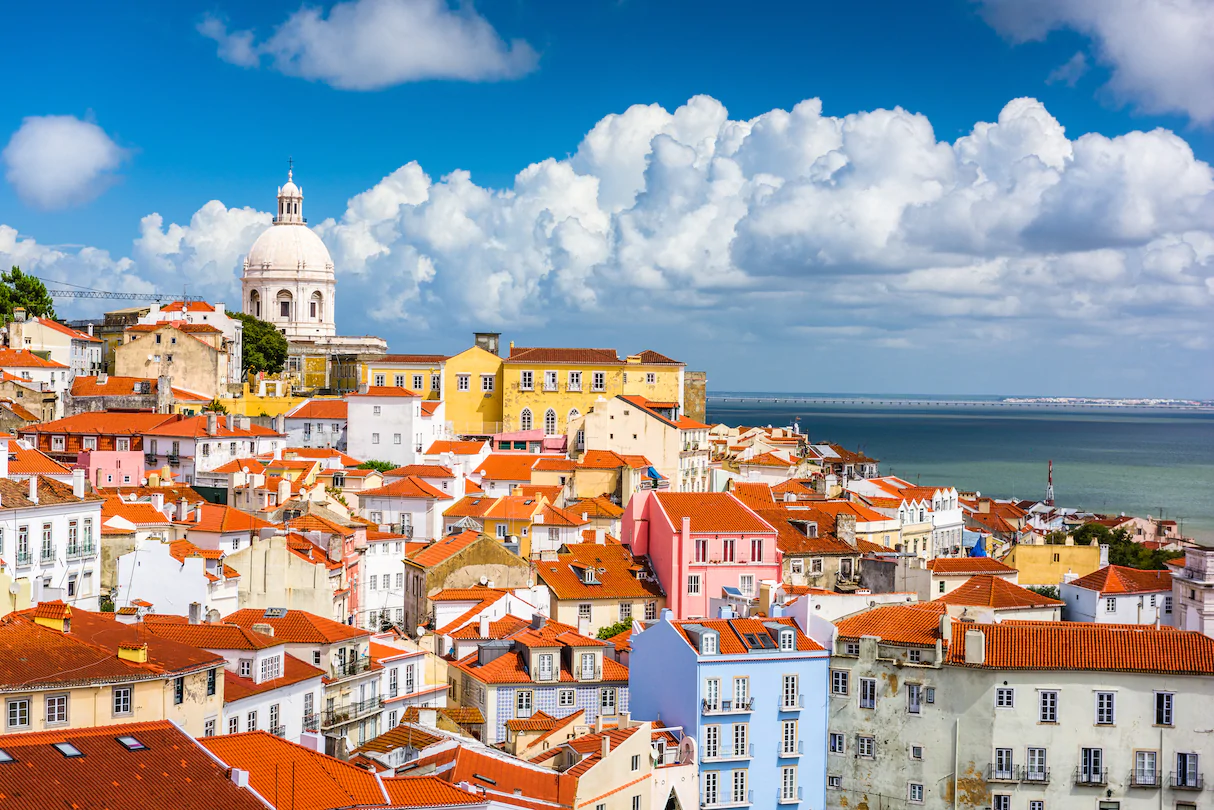
Danny Le Dao  | Machine Learning | August 26th , 2020 




# **About the data**
*   This data describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. All personally identifying information has been removed from the data.


*   Both hotels are located in Portugal (southern Europe) ("H1 at the resort region of Algarve and H2 at the city of Lisbon"). The distance between these two locations is ca. 280 km by car and both locations border on the Northern Atlantic.



*  Acknowledgements
The data is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

 **Featureset Exploration**


1.   **hotel**: H1 = Resort Hotel, H2 = City Hotel
2.   **is_canceled**: value indicating if the booking was canceled (1) or not (0)
3.  **lead_time:**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. **arrival_date_year**: year of arrival date
5. **arrival_date_month**: month of arrival date
6. **arrival_date_week**: week number of year for arrival date
7. **arrival_date_day**: day of arrival date
8. **stays_in_weekend_nights**: number of weekend nights (Sat or Sun) the guest stayed or booked to stay at the hotel
9. **stays_in_week_nights**: number of week nights (Monday to Firday) the guest stayed or booked to stay at the hotel
10. **adults**: number of adults
11. **children**: number of children	
12. **babies**: number of babies	
13. **meal**: Type of meal booked. Categories are presented in standard hospitality. Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
14. **country**: country of origin. Categories are represented in the ISO 3155-32013 format	
15. **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”	
16. **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”	
17. **is_repeated_guest**	:Value indicating if the booking name was from a repeated guest (1) or not (0)
18. **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking	
19. **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
20. **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.	
21. **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due
22. **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
23. **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit/ Non Refund/ Other	
24. **agent**: ID of the travel agency that made the booking
25. **company**: ID of the company/entity that made the booking or responsible for paying the booking.
26. **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer	
27. **customer_type**: Type of booking, assuming one of four categories:  

*   *Contract* - when the booking has an allotment or other type of contract associated to it; 
*   *Group* – when the booking is associated to a group; 

*   *Transient* – when the booking is not part of a group or contract, and is not associated to other transient booking; 
*   *Transient-party* – when the booking is transient, but is associated to at least other transient booking
28. **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights	
29. **required_car_parking_spaces**: Number of car parking spaces required by the customer
30. **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
31. **reservation_status**: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out; No-show
32. **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.


# **Project Objectives**

**1. EDA**

Topics covered and questions to answer from the data:
1. What are the range of prices guest pay for the room?
2. Where do most guests make reservations? 
3. Which are the most demanding time of the year? 
4. How many bookings were canceled?
5. Which month have the highest number of cancelations?
6. Which countries are most represented?


**2. Predict Cancellations**



*   Through initial analysis, it appears that there are **36%** of data points labeled as cancelled
*   As a result, it will be impactful if the we can predict if a guest will make cancellation, which will help the hotel to plan the human resources, concierge staffs, pool staffs, janitors, food, drinks, pool.
*   In addition, if hotel can estimate amount of cancellation, they can prepare with pricing policies for last minutes customers so they can make up for the lost revenues.

**3. Evaluate Feature importance**

Which features are most important to predict cancelations?
Can the model be run on only important features to save computational cost?




In [3]:
#Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
#nice display for notebook
%matplotlib inline

#load the hotel booking dataset
data = pd.read_csv("hotel_bookings.csv")

#Load the first 20 data points
display(data.head(n=10))

#Total number of data points
n_records = len(data)

#Number of cancellation
n_cancellation = len(data[data.reservation_status =="Canceled"])

#Percentage of cancellation 
cancellation_percent = n_cancellation/n_records

#print the results
print("Total number of data points :{}".format(n_records))
print("Number of cancellations: {}".format(n_cancellation))
print("Percentage of cancellations: {}".format(cancellation_percent))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


Total number of data points :119390
Number of cancellations: 43017
Percentage of cancellations: 0.3603065583382193


**Replace Missing Values**

In [4]:
#Replace missing values

#meal: if there's no meal package, replace "undefined" with "SC"
data["meal"].replace("Undefine","SC", inplace=True)

#some rows have 0 adults, 0 children but there are rows with 0 adults and 2 children. Dropping rows with 0 adults, 0 children, and 0 babies, which means dropping rows with no oocupants
no_guests = list(data.loc[data["adults"]+data["children"]+data["babies"]==0].index)
data.drop(data.index[no_guests], inplace=True)

#country: if there's no country data, replace missing values with "unknown"
#company feature: if there's no company made the booking, replace missing values with 0
#agent: if there's no agent made the booking, the booking was most likely booked without an agent, replace agent ID with 0
nan_fill = {"country":"unknown", "agent": 0, "company":0}
new_data = data.fillna(nan_fill)

#Number of records after replace missing values and dropping records with zero occupants
new_data.shape



(119210, 32)

# **Exploring Origins of the Guests**

In [5]:
table = new_data.groupby("country")["country"].count()
display(table)
#install country converter package to convert country code to a full country name
import sys
!{sys.executable} -m pip install country_converter
import country_converter as coco


country
ABW          2
AGO        362
AIA          1
ALB         12
AND          7
          ... 
VNM          8
ZAF         80
ZMB          2
ZWE          4
unknown    478
Name: country, Length: 178, dtype: int64

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for country-converter: filename=country_converter-0.6.7-cp36-none-any.whl size=50215 sha256=8b935d7d87eb0f84c3bc63cff56e808408e4feaabeb06738774cab2339ecef9c
  Stored in directory: /root/.cache/pip/wheels/f9/4a/e7/c8ef69407e41021c414dd56e50bdac424efd1bca3a4346eeb1
Successfully built country-converter


In [6]:
#create a dataframe to calculate number of guests by country
country_df = pd.DataFrame(new_data.loc[data["is_canceled"]==0]["country"].value_counts())
country_df.rename(columns = {"country":"Number of guests"}, inplace = True)
total_guests = country_df["Number of guests"].sum()
country_df["percentage of guests"] = round(country_df["Number of guests"]/total_guests*100)
country_df["country"]=country_df.index
#extracting the country code column and create a list
list_of_countries = country_df["country"].to_list()
#convert the country code list to country full name list
list_of_countries = coco.convert(names=list_of_countries, to = 'name_short')
#convert the country full name list to a column and add to country dataframe
country_df["full_country_name"] = list_of_countries 
display(country_df)
#create a pie plot to visualize
plot_country = px.pie(country_df, 
                      values = "Number of guests",
                      names = "full_country_name",
                      title = "Country Represented",
                      template = "seaborn")
plot_country.update_traces(textposition ="inside", textinfo="value+percent+label")
plot_country.show()
import warnings
warnings.filterwarnings(action="ignore")

,Number of guests,percentage of guests,country,full_country_name
PRT,20977,28.0,PRT,Portugal
GBR,9668,13.0,GBR,United Kingdom
FRA,8468,11.0,FRA,France
ESP,6383,9.0,ESP,Spain
DEU,6067,8.0,DEU,Germany
...,...,...,...,...
MDG,1,0.0,MDG,Madagascar
PYF,1,0.0,PYF,French Polynesia
LCA,1,0.0,LCA,St. Lucia
ZMB,1,0.0,ZMB,Zambia


In [7]:
#create heatmap to visualize countries represented by the amount of guests
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = country_df['country'],
    z = country_df['Number of guests'],
    text = country_df['full_country_name'],
    colorscale = 'emrld',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Number of guests',
))

fig.update_layout(
    title_text='Countries represented',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)
fig.show()

**Observations**


*   As can be seen, most guests are from Portugal, which is where the two hotels located. The majority of the guests are from EU, such as UK, France, Spain, Germany
*   Notably, there are also guests from all over the world such as Brazil and China. 

# **What are the range of prices guest pay for the room?**

There are many factors that might impact the prices per night, for example: room type, the booking channels, the type of meals the guests order (meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)), the time of the week, month, year that the guests are staying. This section will explore the price per room relative to these factors. 



In [8]:
#analyze adr feature: average daily rate
new_data[["adr"]].describe()

,adr
count,119210.000000
mean,101.969092
std,50.434007
min,-6.380000
25%,69.500000
50%,94.950000
75%,126.000000
max,5400.000000


The maximum average daily rate is 5400, this means we should normalize the data by calculate daily rate per person. 

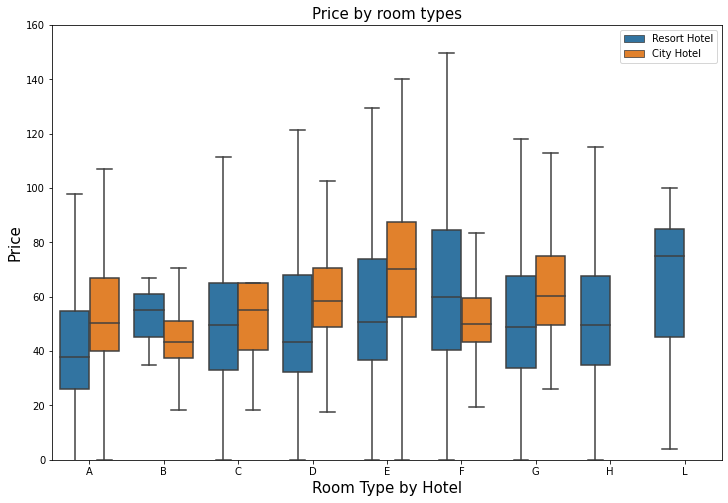

In [9]:
#Quantifying the daily rate per person, counting adults and children as paying party
new_data["adr_byperson"]=new_data["adr"]/(new_data["adults"]+new_data["children"])
#Price per night by reserved_room_type
room_prices = new_data[["hotel","reserved_room_type","adr_byperson"]].sort_values("reserved_room_type")

#boxplot:
plt.figure(figsize=(12,8))
sb.boxplot(x="reserved_room_type",
            y="adr_byperson",
            hue="hotel",
            data=room_prices,
            hue_order=["Resort Hotel","City Hotel"],
            fliersize=0)
plt.title("Price by room types", fontsize=15)
plt.xlabel("Room Type by Hotel", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.legend(loc="upperright")
plt.ylim(0,160)
plt.show()


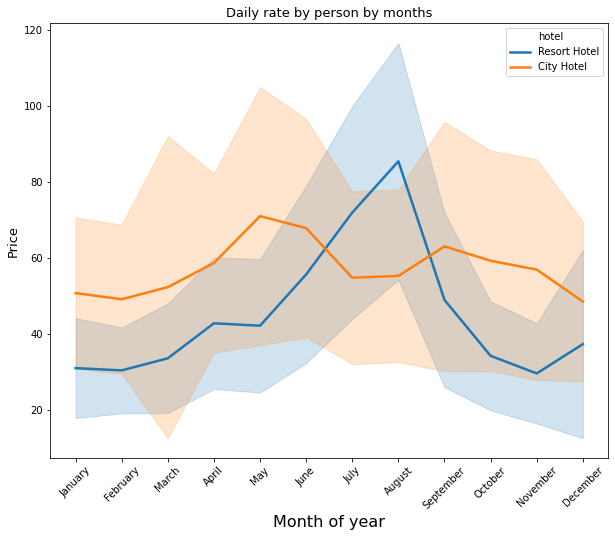

In [10]:
#price per night by season. Since months are time-series data, it's appropriate to use line charts, in order to do so, we have to order the months. 
#creating dataframe
room_prices_months =new_data[["hotel","arrival_date_month","adr_byperson"]].sort_values("arrival_date_month")
#order by months
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_months["arrival_date_month"] = pd.Categorical(room_prices_months["arrival_date_month"], categories=ordered_months, ordered=True)
#create line chart
plt.figure(figsize=(10, 8))
sb.lineplot(x = "arrival_date_month", y="adr_byperson", hue="hotel", data=room_prices_months, 
            hue_order = ["Resort Hotel","City Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Daily rate by person by months", fontsize=13)
plt.xlabel("Month of year", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price", fontsize=13)
plt.show()

-**Obersevations**

-In the graph above, blue and orange lines represented the average daily rates by months, and the blue and orange regions represented the standard deviation in prices, showing how prices fluctuate from the mean.

-*Resort Hotel*: Resort hotel seems to be easier during summer months from June to August and peaked during July. 

-*City Hotel*: City Hotel is busier during Fall and Spring, peaked during May and September, with higher fluctuations in prices than Resort hotel.


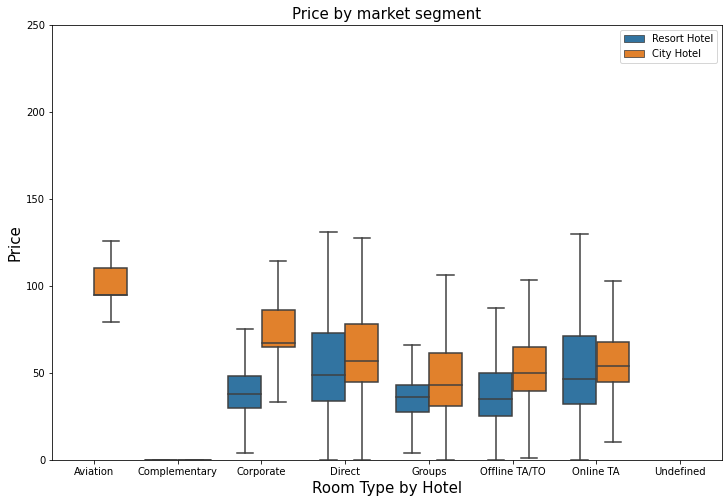

In [11]:
room_prices_segment = new_data[["hotel","market_segment","arrival_date_month","adr_byperson"]].sort_values("market_segment")
#boxplot:
plt.figure(figsize=(12,8))
sb.boxplot(x="market_segment",
            y="adr_byperson",
            hue="hotel",
            data=room_prices_segment,
            hue_order=["Resort Hotel","City Hotel"],
            fliersize=0)
plt.title("Price by market segment", fontsize=15)
plt.xlabel("Room Type by Hotel", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.legend(loc="upperright")
plt.ylim(0,250)
plt.show()

**Observations:**

-Generally, city hotel's average daily rate by person is higher than resort 
hotel. 

-For aviation segment, reservations are all in city hotel, this make senses since pilots and flight attendants tend to spend one day or two at the city as a transit for new flight.

-Price fluctuation for Offline (Travel Agents and Tour operators) segment is less than price fluctuation for Direct and Online segments. This may imply that Offline Travel Agents and Tour Operators may secure a more stable rates due to consistent guests flows and deals with hotel. 

In [12]:
#Exploring price by market segment by the businest time of year (May,July, September)
room_prices_segment_season = new_data[["hotel","market_segment","arrival_date_month","adr_byperson"]]
busy_month =["May","July","September"]
#filter and re-oder May, July, September as these are the busiest time of the year as described earlier
room_prices_segment_season = room_prices_segment_season[room_prices_segment_season["arrival_date_month"].isin(busy_month)]
ordered_months_1 = [ "May","July",  "September"]
room_prices_segment_season["arrival_date_month"] = pd.Categorical(room_prices_segment_season["arrival_date_month"], categories=ordered_months_1, ordered=True)
display(room_prices_segment_season)

,hotel,market_segment,arrival_date_month,adr_byperson
0,Resort Hotel,Direct,July,0.000000
1,Resort Hotel,Direct,July,0.000000
2,Resort Hotel,Direct,July,75.000000
3,Resort Hotel,Corporate,July,75.000000
4,Resort Hotel,Online TA,July,49.000000
...,...,...,...,...
117737,City Hotel,Direct,July,56.250000
117772,City Hotel,Direct,July,44.166667
117821,City Hotel,Online TA,July,53.550000
117822,City Hotel,Online TA,July,53.550000


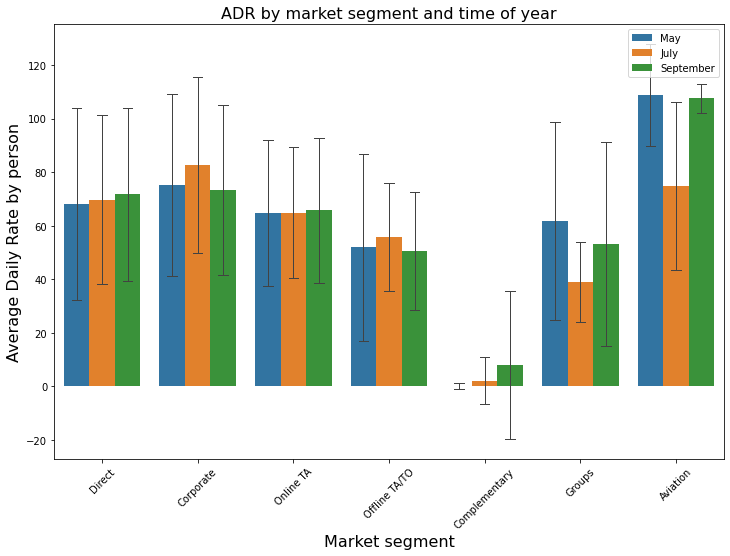

In [13]:
#boxplot: Average Daily Rate by person by market segment and by time of the year
plt.figure(figsize=(12, 8))
sb.barplot(x="market_segment",
            y="adr_byperson",
            hue="arrival_date_month",
            data=room_prices_segment_season,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("ADR by market segment and time of year", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate by person", fontsize=16)
plt.legend(loc="upper right")
plt.show()

**Observations**


*   Aviation average daily rate by person still remains the highest in those busiest months of the year. This doesn't necessarily means aviation segment receive higher rates, it can also mean that these flight attendants/pilots travel solo, whereas family travels as 2-3 members group so by person the rates are lower. Let's explore all other features to see for all data points with market segments labeled aviation to figure out.



In [14]:
Airline = new_data.loc[new_data["market_segment"]== "Aviation"][["is_canceled","stays_in_weekend_nights","stays_in_week_nights",
                                                                                "adults",
                                                                                "lead_time",
                                                                                "adr_byperson",]].describe()

Non_Airline= new_data.loc[new_data["market_segment"]!= "Aviation"][["is_canceled","stays_in_weekend_nights","stays_in_week_nights",
                                                                                    "adults",
                                                                                    "lead_time",
                                                                                    "adr_byperson",]].describe()
display(Airline)
display(Non_Airline)
                                                                  

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,lead_time,adr_byperson
count,235.000000,235.000000,235.000000,235.000000,235.00000,235.000000
mean,0.221277,1.102128,2.536170,1.012766,4.47234,100.270979
std,0.415992,1.351715,2.570745,0.112503,4.61629,20.376689
min,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.00000,95.000000
50%,0.000000,1.000000,2.000000,1.000000,3.00000,95.000000
75%,0.000000,2.000000,3.000000,1.000000,6.00000,110.000000
max,1.000000,5.000000,11.000000,2.000000,23.00000,193.500000


,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,lead_time,adr_byperson
count,118975.000000,118975.000000,118975.000000,118975.000000,118975.000000,118971.000000
mean,0.371061,0.926707,2.499122,1.860878,104.306031,55.038212
std,0.483091,0.994263,1.895552,0.574499,106.888885,29.016998
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.190000
25%,0.000000,0.000000,1.000000,2.000000,18.000000,37.440000
50%,0.000000,1.000000,2.000000,2.000000,69.000000,49.500000
75%,1.000000,2.000000,3.000000,2.000000,161.000000,66.000000
max,1.000000,19.000000,50.000000,55.000000,737.000000,2700.000000


**Observations**: 
Mean lead_time for airline segments ar 4.5 days, whereas mean lead_time for non airlines segments are 104 days. This makes sense since booking close to the arrival date typically results in higher rate.

# **Predicting Cancellations**

As described in previous section, 36% of data points were marked as cancelled. As a result, reasonable prediction of cancellation rates can help hotel in allocate human resources and hotel supply to save cost. 

Tuititvely, cancellations can result from long lead time, vary by season, whether if there's a deposit, let's start exploring cancellations by season. 
Since is_canceled feature is categorical and binary (0 represents no cancellation, 1 represents cancellation), the sum of is_canceled feature will result in the amount of cancellation. 


,Hotel,Month,Monthly Bookings,Monthly Cancellations,cancellation_rate
0,Resort Hotel,April,3609,1059,0.293433
1,Resort Hotel,August,4894,1637,0.334491
2,Resort Hotel,December,2645,631,0.238563
3,Resort Hotel,February,3102,794,0.255964
4,Resort Hotel,January,2191,325,0.148334
5,Resort Hotel,July,4573,1436,0.314017
6,Resort Hotel,June,3044,1007,0.330815
7,Resort Hotel,March,3334,763,0.228854
8,Resort Hotel,May,3559,1024,0.287721
9,Resort Hotel,November,2435,460,0.188912


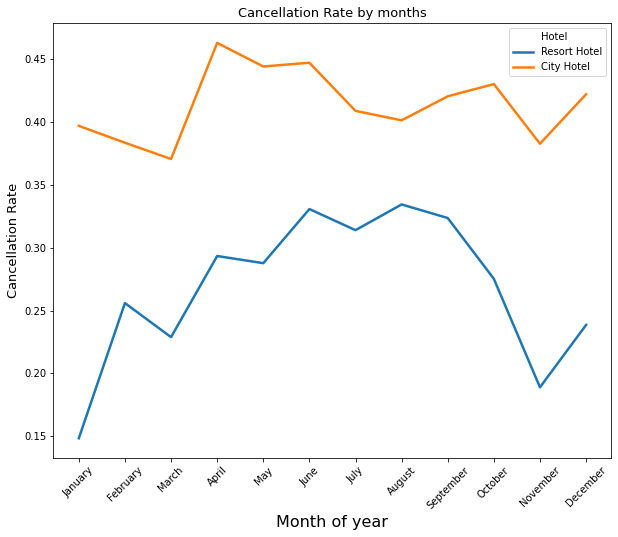

In [15]:
#count the number of booking and cancellations monthly by type of hotel (resort hotel and city hotel)
resort_monthly_book = new_data.loc[(new_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
resort_monthly_cancel = new_data.loc[(new_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

city_monthly_book = new_data.loc[(new_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
city_monthly_cancel = new_data.loc[(new_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

#create cancellations dataframe by type of hotel from the columns created above
resortcancel_df = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(resort_monthly_book.index),
                                "Monthly Bookings": list(resort_monthly_book.values),
                                "Monthly Cancellations": list(resort_monthly_cancel.values)})
citycancel_df   = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(city_monthly_book.index),
                                "Monthly Bookings": list(city_monthly_book.values),
                                "Monthly Cancellations": list(city_monthly_cancel.values)})

#joining resort cancel data frame and city cancel data frame together
cancel_df = pd.concat([resortcancel_df, citycancel_df], ignore_index=True)
#adding cancellation rate column
cancel_df["cancellation_rate"] = cancel_df["Monthly Cancellations"] / cancel_df["Monthly Bookings"] 
#reorder by month
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
cancel_df["Month"] = pd.Categorical(cancel_df["Month"], categories=ordered_months, ordered=True)
display(cancel_df)
#visualize cancellation by months
plt.figure(figsize=(10, 8))
sb.lineplot(x = "Month", y="cancellation_rate", hue="Hotel", data=cancel_df,  
            hue_order = ["Resort Hotel","City Hotel"], dashes=True, markers="o", ci="sd", size="Hotel", sizes=(2.5, 2.5))
plt.title("Cancellation Rate by months", fontsize=13)
plt.xlabel("Month of year", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancellation Rate", fontsize=13)
plt.show()



**Observations**

1. Throughout the year, city hotel has more cancellation rate than resort hotel. 
2. City hotel has highest cancellation rate during Spring (April), lowest during winter
3. Resort Hotel has highest cancellation rate during summer (June to September), lowest during winter (similar to City Hotel). The high cancellation rate during rate seems to positively correlates to the high booking rate and high average daily rate. 



In order to further explore how other features impact the cancellations, we can evaluate correlation of all features with is_canceled feature. Since is_canceled is a binary feature, it might not be appropriate to use correlation plot

In [16]:
#calculating the correlation between "is_canceled" (binary, 0 or 1) feature with other features(numerical or categorical)
correlation_cancel = data.corr()["is_canceled"]
correlation_cancel.sort_values(ascending=False)[1:]


lead_time                         0.292876
previous_cancellations            0.110139
adults                            0.058182
days_in_waiting_list              0.054301
adr                               0.046492
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
children                          0.004862
stays_in_weekend_nights          -0.001323
arrival_date_day_of_month        -0.005948
company                          -0.023439
babies                           -0.032569
previous_bookings_not_canceled   -0.057365
agent                            -0.083389
is_repeated_guest                -0.083745
booking_changes                  -0.144832
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

As can be seen, **lead_time** and **previous_cancellations** seems to have some degree of positive correlation to whether a reservation will be canceled. In addition, **total_of_special_requests** and **required_car_parking_spaces** seems to have some degree of negative correlation to cancellation possibility. This can be intepretated as the higher the amount of time elapsed between booking date and arrival date and previous cancellations requests, the higher than chance of cancellation. In addition, the higher the amount special requests and required parking spaces, the less chance of cancellation will be. 

(0.0, 250.0)

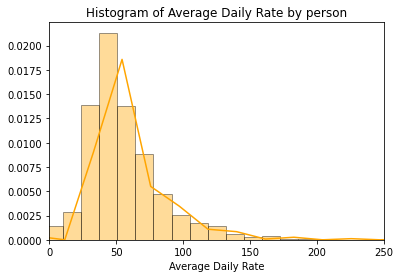

In [17]:
sb.distplot(new_data['adr_byperson'], hist=True, kde=True, 
             bins=200, color = 'orange',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Average Daily Rate by person')
plt.xlabel('Average Daily Rate')
plt.xlim(0,250)

Text(0.5, 0, 'LeadTime')

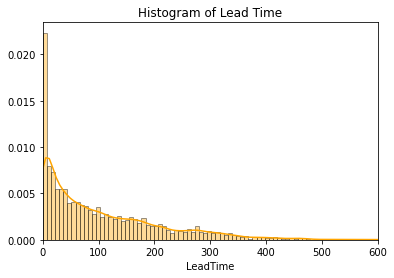

In [ ]:
sb.distplot(new_data['lead_time'], hist=True, kde=True, 
             bins=100, color = 'orange',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.xlim(0,600)
plt.title('Histogram of Lead Time')
plt.xlabel('LeadTime')

Explore the prices in relative to marketing segments

Text(0.5, 0, 'LeadTime')

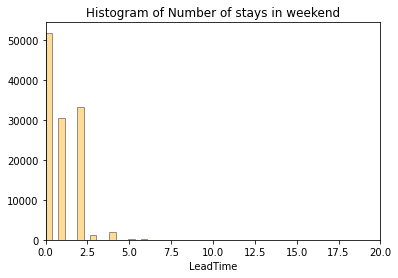

In [ ]:
sb.distplot(new_data['stays_in_weekend_nights'], hist=True, kde= False, 
             bins=50, color = 'orange',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.xlim(0,20)
plt.title('Histogram of Number of stays in weekend')
plt.xlabel('LeadTime')

Text(0.5, 0, 'LeadTime')

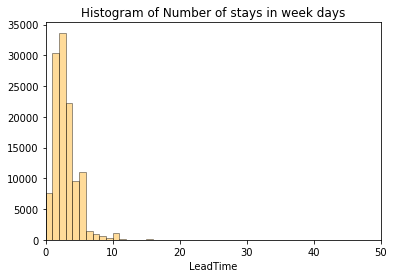

In [ ]:
sb.distplot(new_data['stays_in_week_nights'], hist=True, kde= False, 
             bins=50, color = 'orange',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.xlim(0,50)
plt.title('Histogram of Number of stays in week days')
plt.xlabel('LeadTime')


**Normalizing Numerical Features**
As can be seen from distribution plots above, most numeric data's distribution are highly skewed. Applying a scaling to the data does not change the shape of each feature's distribution, however, normalization ensures that each feature is treated equally when applying supervised learner. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning.

**Data Preprocessing:**

We can see there are several features for each record that are non-numeric.
For this dataset, we can see that these following features are non-numeric and categorical:
 **meal, 
country,
market_segment,
distribution_channel,
reserved_room_type,
assigned_room_type,
deposit_type,
agent,
company,
customer_type, 
reservation_status,
reservation_status_date**

 Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. 

In [18]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['adr', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children','babies','previous_cancellations','previous_bookings_not_canceled']

features_minmax_transform = pd.DataFrame(data = new_data)
features_minmax_transform[numerical] = scaler.fit_transform(features_minmax_transform[numerical])

categorical = ["hotel","meal", "market_segment", "distribution_channel","reserved_room_type", "deposit_type", "customer_type","country","arrival_date_month"]
#one-hot-encoding for selected categorical features except for "countries" since there are 300 classes, which will create 300 more columns to our dataframe.
features_minmax_transform = pd.get_dummies(data = features_minmax_transform, columns = ["hotel","meal", "market_segment", "distribution_channel","reserved_room_type", "deposit_type", "customer_type"])

# There are more than 300 classes in "country" features and there are 12 classes in "arrival_date_month" features, so I wanted to use label encoder on this feature.
le = LabelEncoder()
features_minmax_transform["country"] = le.fit_transform(features_minmax_transform["country"])
month_convert = {"arrival_date_month":     {"January": 1, "February": 2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}}
features_minmax_transform.replace(month_convert, inplace=True)

#Dropping reservation_status,assigned_room_type and reservation_status_date features
features_minmax_transform.drop(["reservation_status","reservation_status_date","assigned_room_type","adr_byperson"],axis=1, inplace=True)

# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))


print("# of NaN in each columns:", features_minmax_transform.isnull().sum(), sep='\n')


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0.464043,2015,7,27,1,0.0,0.00,0.036364,0.0,0.0,135,0,0.0,0.0,3,0.0,0.0,0,0.001180,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,1.000000,2015,7,27,1,0.0,0.00,0.036364,0.0,0.0,135,0,0.0,0.0,4,0.0,0.0,0,0.001180,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0.009498,2015,7,27,1,0.0,0.02,0.018182,0.0,0.0,59,0,0.0,0.0,0,0.0,0.0,0,0.015053,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0.017639,2015,7,27,1,0.0,0.02,0.018182,0.0,0.0,59,0,0.0,0.0,0,304.0,0.0,0,0.015053,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0.018996,2015,7,27,1,0.0,0.04,0.036364,0.0,0.0,59,0,0.0,0.0,0,240.0,0.0,0,0.019307,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# of NaN in each columns:
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel_City Hotel                  0
hotel_Resort Hotel                0
meal_BB                           0
meal_FB                           0
meal_HB                           0
me

As can be seen, there are still 4 missing values for children features, applying fill NA to this columns

In [19]:
#Filling NA values for children features
features_minmax_transform['children'] = features_minmax_transform['children'].fillna(0)

In [20]:
#seperating features and predicted values
training = features_minmax_transform.drop(["is_canceled"], axis=1)
testing = features_minmax_transform["is_canceled"]

# **Model Evaluation Metrics**
**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of reservation we classified as canceled, actually canceled. It is a ratio of true positives(reservations classified as canceled, and which are actually canceled) to all positives(all reservations classified as cancelled, irrespective of whether that was the correct classification), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

**Recall(sensitivity)** tells us what proportion of reservation that actually were canceled were classified by us as canceled. It is a ratio of true positives(reservations classified as canceled, and which are actually canceled) to all the reservations that were actually canceled, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

In [21]:
# TODO: Calculate accuracy, precision and recall
TP = np.sum(testing)
FP = testing.count() - TP
TN = 0
FN = 0
accuracy = float(TP)/(TP+FP)
recall = float(TP)/(TP+FN)
precision = accuracy

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+0.5**2)*(precision*recall)/(0.5**2*precision+recall)

# Print the results 
print("Naive Predictor: Accuracy score: {:.4f}, F-score: {:.4f}".format(accuracy, fscore))

Naive Predictor: Accuracy score: 0.3708, F-score: 0.4241


**Shuffle and Split Data**

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. We will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.


In [22]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training, 
                                                    testing, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
X_train.shape

Training set has 95368 samples.
Testing set has 23842 samples.


(95368, 57)

# **Creating a Training and Predicting Pipeline**
To properly evaluate the performance of each model chosen, it's important that we create a training and predicting pipeline that allows us to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. 

In [23]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    #Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    #Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #  then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta =0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [24]:
#Create visualization
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (12,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 13, y = 1.10)
    pl.tight_layout()
    pl.show()

# ***Model Selection***

The following are some of the supervised learning models that are suitable for classification problems:

Gaussian Naive Bayes (GaussianNB), Decision Trees, Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting), K-Nearest Neighbors (KNeighbors), Stochastic Gradient Descent Classifier (SGDC), Support Vector Machines (SVM),
Logistic Regression

1. **Random Forest Classifier:**



*   Works well with recommendation services, such as recommend pieces of clothes someone might like based on previous search, or recommend movies based on history of users on Hulu or Netflix.
*   Strength of Random Forest Classifier: 

      ○ Can handle categorical, continuous, and linear variables well. Can reduce the problems of overfitting more than decision trees and therefore improves the accuracy 

      ○ Random Forest Classifier can be used to solve both classification and regression problems, and also automatically handle missing values 

      ○ Random Forest Classifier is robust to outliers and less likely to be impacted by noise

*   Weakness of Random Forest Classifier: 
  
     ○ More complex than decision trees since it creates a lot of tree and combines their output. Therefore, it requires more computational power and resources. 
    
      ○ The training time is longer

  
2. **Gradient Boosting Classifier**: 


*   Application: Works well with ranking problem, such as ranking of searchs results by search engines. GBC also works well with anomaly detection in DNA Sequences, credit card transaction, cybersecurity
*   Strength: 
  
  ○ Works well with large and complex dataset. Can help reduce bias and variance since it creates a robust classifier from less robust tree. This is done through building a tree to correct errors in the previous tree.
  
  ○ GCB can also handle different type of predictor varaibles and handle missing values.




*   Weakness:

  ○ It can take a lot of time to train. There are more parameters to tune when it comes to model tuning because there are three parameters: number of trees, depth of trees and learning rate, and each tree built is generally shallow.

  ○ GBC is also senstivie to overfitting if the data is noisy. (from medium.com)


RandomForestClassifier trained on 953 samples.
RandomForestClassifier trained on 9536 samples.
RandomForestClassifier trained on 95368 samples.
LogisticRegression trained on 953 samples.
LogisticRegression trained on 9536 samples.
LogisticRegression trained on 95368 samples.
GradientBoostingClassifier trained on 953 samples.
GradientBoostingClassifier trained on 9536 samples.
GradientBoostingClassifier trained on 95368 samples.


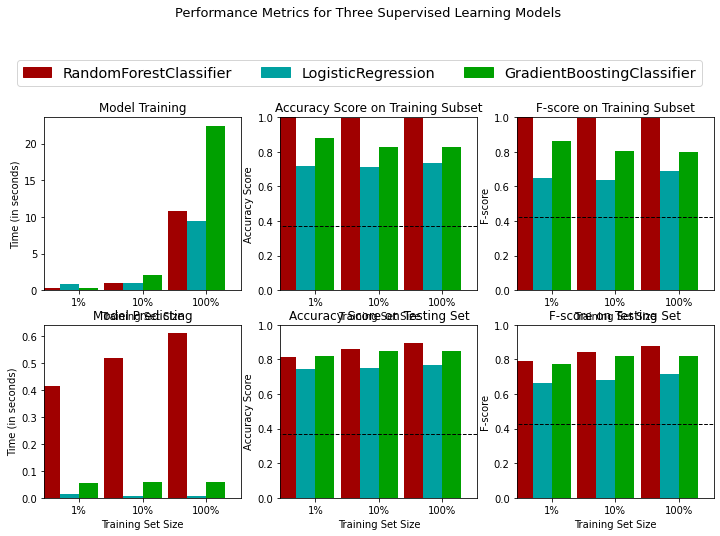

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


#Initialize the three models
clf_A = RandomForestClassifier(random_state=42,n_jobs=-1)
clf_B = LogisticRegression(random_state=42,n_jobs=-1)
clf_C = GradientBoostingClassifier(random_state=42)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

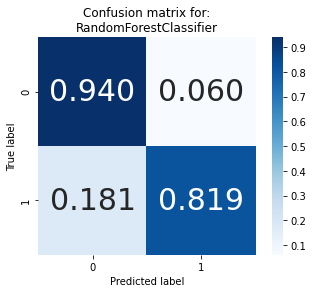

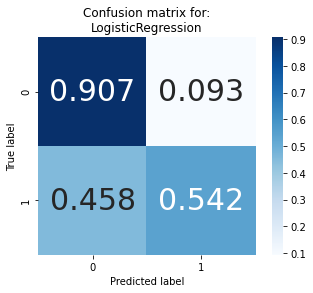

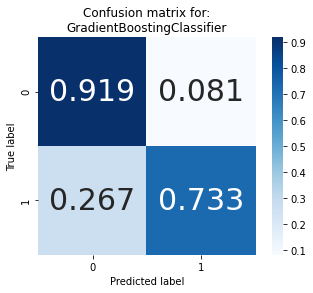

In [26]:
from sklearn.metrics import confusion_matrix

for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sb.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

**Observation**



*   Out of three models, the best model for this data set is **Random Forest Classifier. **.
*   F-score and accuracy score on the testing when 100% of training data is used for Random Forest Classifier is the highest.



# ***Implementation: Model Tuning***

Now that we have decided Random Forest is the best model. We will tune model's hyperparameter to see if we can achieve higher accuracy score/f1 score.



Unoptimized model
------
Accuracy score on testing data: 0.8948
F-score on testing data: 0.8755

Optimized Model
------
Final accuracy score on the testing data: 0.8960
Final F-score on the testing data: 0.8772


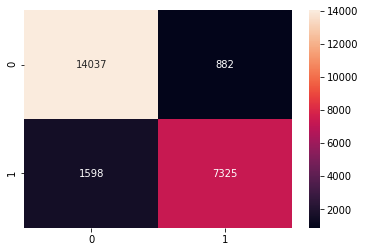

In [28]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, fbeta_score

#Initialize the classifier
clf = RandomForestClassifier(random_state=42)

#Create the parameters list
parameters = {'n_estimators': [150, 250, 350],
              'min_samples_split': [2, 3, 4]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

#Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

#Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
pred = best_clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '')

# **Feature Importances**

Determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an reservation is likely to be canceled. 


In [ ]:
#Function to plot features importance
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

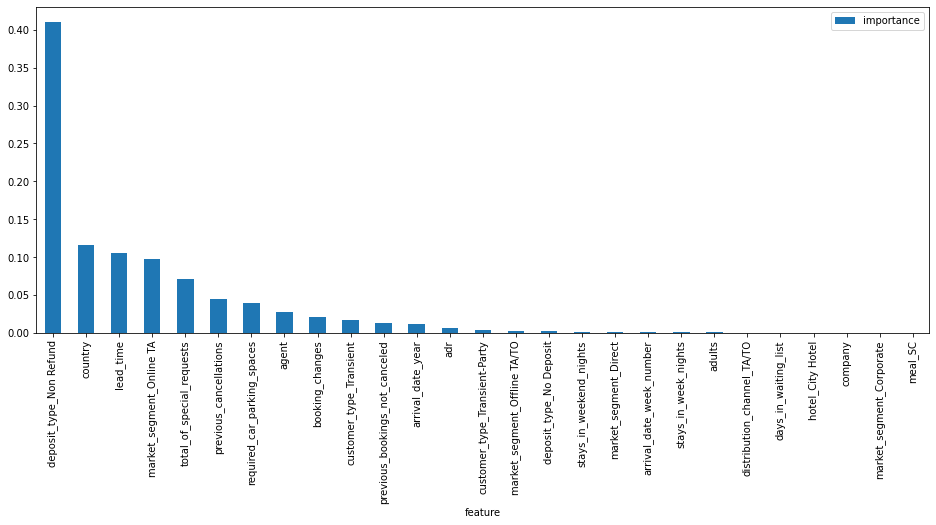

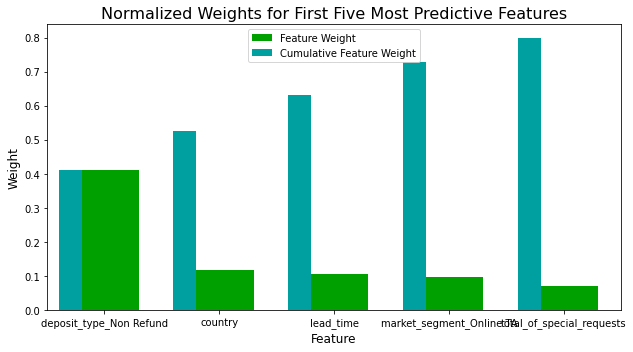

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model_1 = RandomForestClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature':training.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

#set index to 'feature' and visualize
feature_importances.set_index('feature', inplace=True, drop=True)
feature_importances[0:27].plot.bar(figsize=(16,6))
plt.show()

# Plot
feature_plot(importances, X_train, y_train)


**Observations:**

Five most important features that help predict cancellations are:


*   total_of_special_Requests
*   market_segment_online TA
*   lead_time
*   country
*   deposit_type_Non Refund



Plotting the effects of lead_time, deposit_type, and adr (Average daily rate) on the rate of cancellations. 







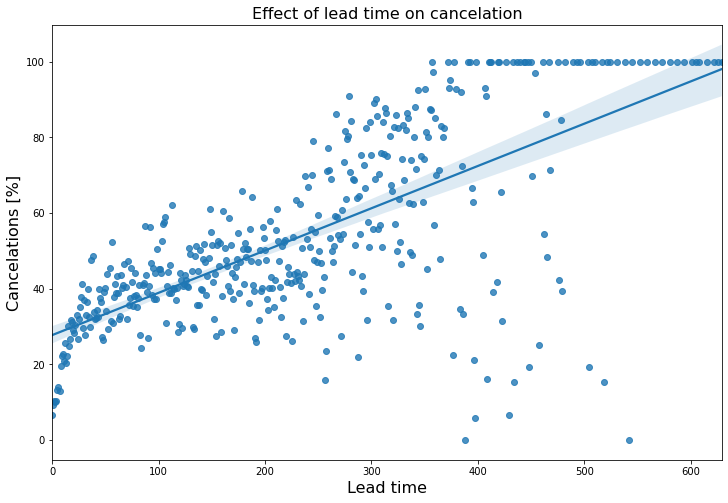

In [29]:
lead_cancel = data.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_10 = lead_cancel.loc[lead_cancel["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sb.regplot(x=lead_cancel_10.index, y=lead_cancel_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

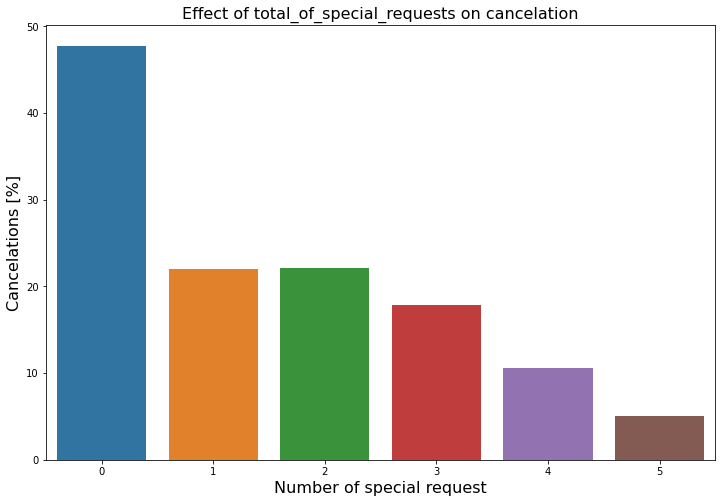

In [30]:
total_request_cancel_data = data.groupby("total_of_special_requests")["is_canceled"].describe()

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=total_request_cancel_data.index, y=total_request_cancel_data["mean"] * 100)
plt.title("Effect of total_of_special_requests on cancelation", fontsize=16)
plt.xlabel("Number of special request", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

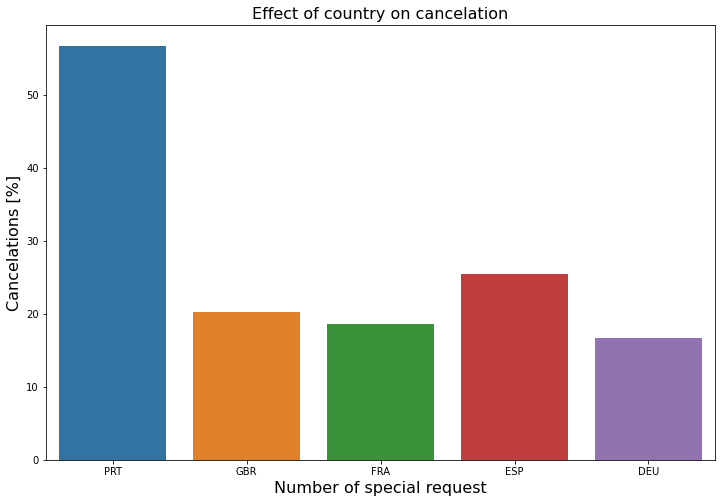

In [31]:
country_cancel_data = data.groupby("country")["is_canceled"].describe().sort_values(by="count",ascending=False).head(n=5)
#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=country_cancel_data.index, y=country_cancel_data["mean"] * 100)
plt.title("Effect of country on cancelation", fontsize=16)
plt.xlabel("Number of special request", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()